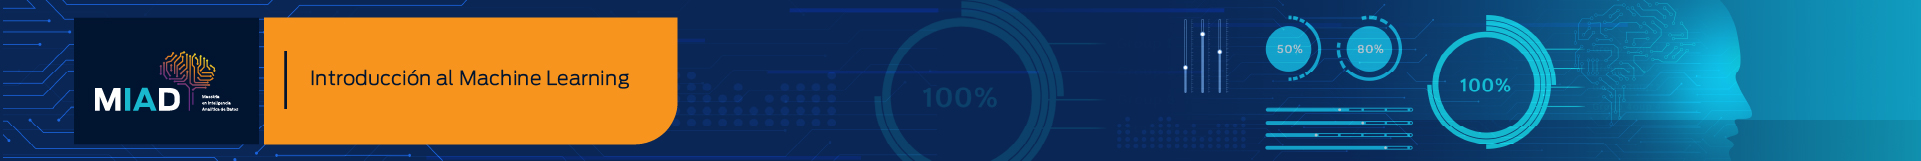

# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos] 

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos] 

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos] 

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos] 

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos] 

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats


**Librerias a usar y apertura del archivo**

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

Carseats= pd.read_csv("Carseats.csv")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
valores_unicos = Carseats["ShelveLoc"].unique()
print("Valores únicos en 'ShelveLoc':", valores_unicos)

Valores únicos en 'ShelveLoc': ['Bad' 'Good' 'Medium']


In [4]:
cols_to_encode = ['ShelveLoc', 'Urban', 'US']

# Generar columnas dummy para las columnas especificadas
dummies = pd.get_dummies(Carseats[cols_to_encode], prefix=cols_to_encode)

# Eliminar las columnas originales y concatenar los dummies
Carseats = pd.concat([Carseats.drop(cols_to_encode, axis=1), dummies], axis=1)

Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,False,True,False,False,True,False,True
396,6.14,139,23,3,37,120,55,11,False,False,True,True,False,False,True
397,7.41,162,26,12,368,159,40,18,False,False,True,False,True,False,True
398,5.94,100,79,7,284,95,50,12,True,False,False,False,True,False,True


In [5]:
YTotal = Carseats[['Sales']]
XTotal = Carseats.drop(columns = ['Sales'])
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [6]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
print(Carseats.describe())
print(Carseats.info())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

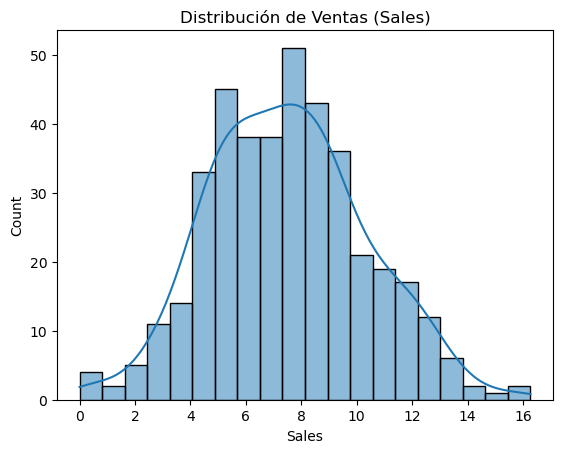

In [7]:
sns.histplot(Carseats["Sales"], kde=True, bins=20)
plt.title("Distribución de Ventas (Sales)")
plt.show()

Corresponde a las ventas de sillas para niños. Como se puede observar sigue una distribución continua donde se concentra la mayoria de ventas en 8 sillas por establecimiento. Gráficamente se podria pensar en una distribución casi - normal para las venta, con una asimetria a la derecha. Además se debe tener en cuenta valores extremos mayores de 12 que podrian considerarse valores de venta altos pero no atípicos. 

Se presenta la relación entre las variables de la base de Carseaters donde se evidencian los posibles efectos, algunos no lineales de las variables contra la variable de interes **Sales**

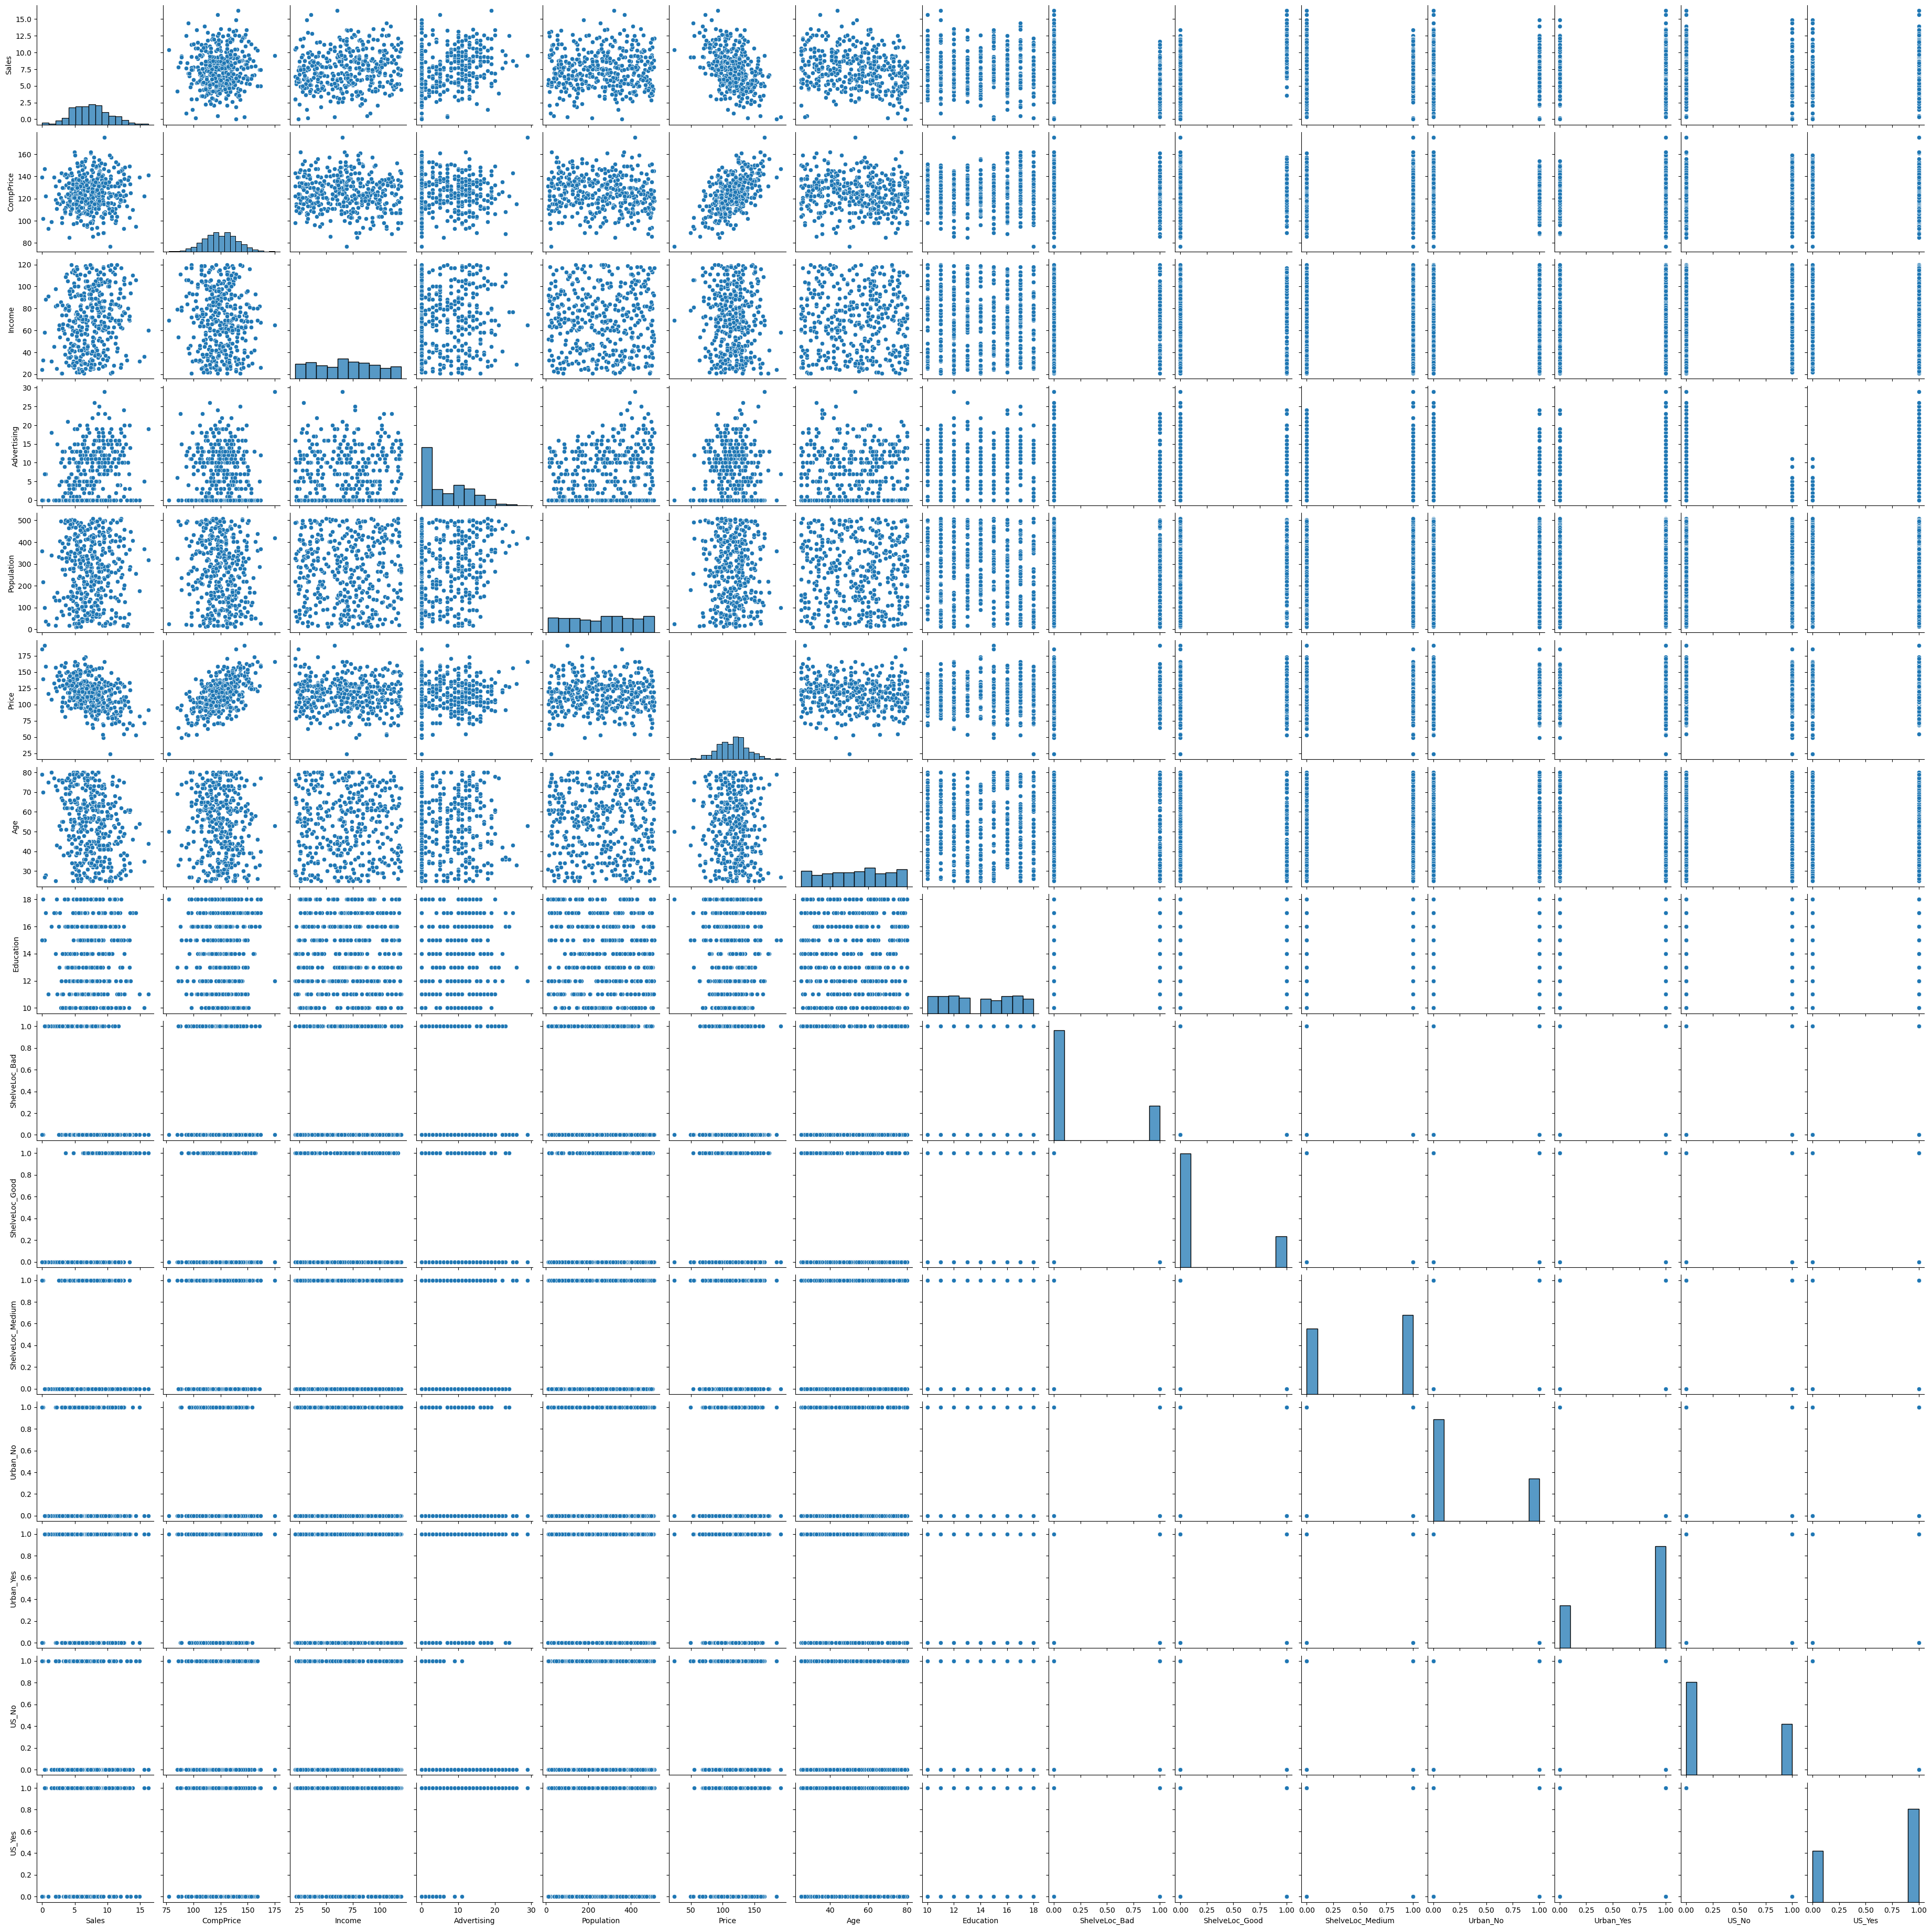

In [43]:
XTotalAux=pd.DataFrame(Carseats)
sns.pairplot(XTotalAux, kind="scatter")
plt.show()

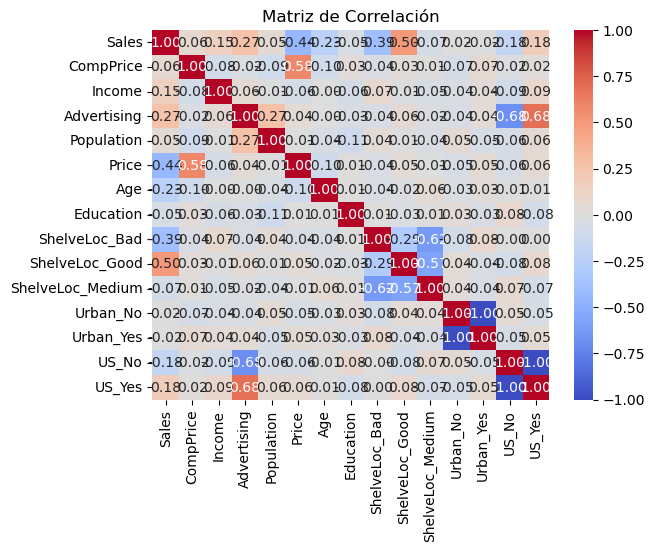

In [8]:
sns.heatmap(Carseats.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Análisis de varaible Sales:
Sales tiene relaciones fuertes con las siguientes variables:

- **Price**: Correlación negativa moderada, lo que indica que a un mayor precio menores ventas
- **ShelveLoc_Good**: Relación positiva, lo que sugiere que una buena ubicación en el estante, mejora significativamente las ventas. 
- **Advertising**: La publicidad puede aumentar las ventas de manera moderada. Esta variable es candidata a no tener una razón lineal
- **Income**: Ingresos de clientes pueden influir en las ventas. 

La relaciones entre CompPrice y Price es importante de observar ya que tiene una relación negativa fuerte, coherente con el sentido de que si el precio de la competencia es alta, las tiendas podrían ajustar los precios a la baja para ser competitivas. 

A continuación se muestran las dispersiones para cada una de las variables con relación fuerte de Sales

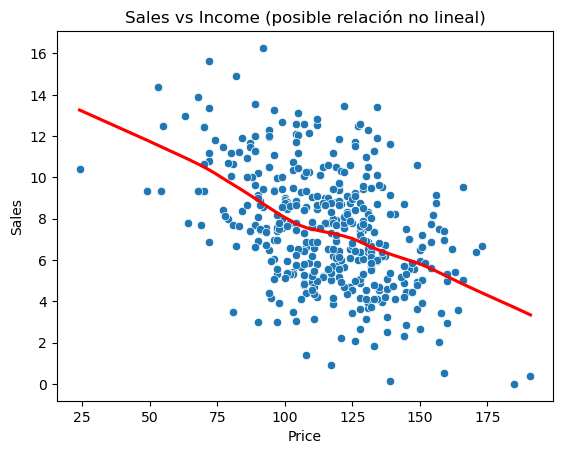

In [9]:
sns.scatterplot(x="Price", y="Sales", data=Carseats)
sns.regplot(x="Price", y="Sales", data=Carseats, scatter=False, lowess=True, color="red")
plt.title("Sales vs Income (posible relación no lineal)")
plt.show()

Relación negativa entre ventas y precio. Coherente con lo la teoría económica. 

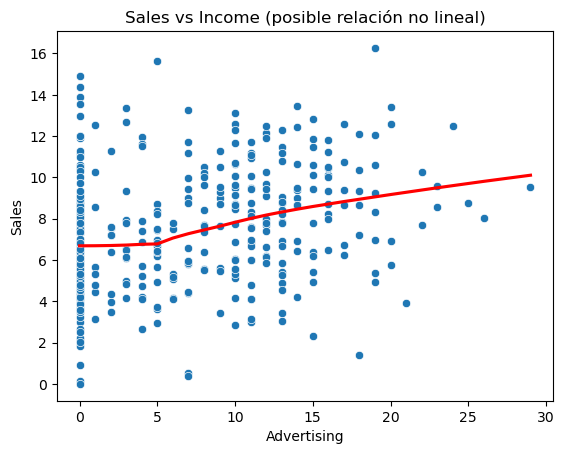

In [10]:
sns.scatterplot(x="Advertising", y="Sales", data=Carseats)
sns.regplot(x="Advertising", y="Sales", data=Carseats, scatter=False, lowess=True, color="red")
plt.title("Sales vs Income (posible relación no lineal)")
plt.show()

Relación debilmente positiva entre la inversión en publicidad y las ventas.

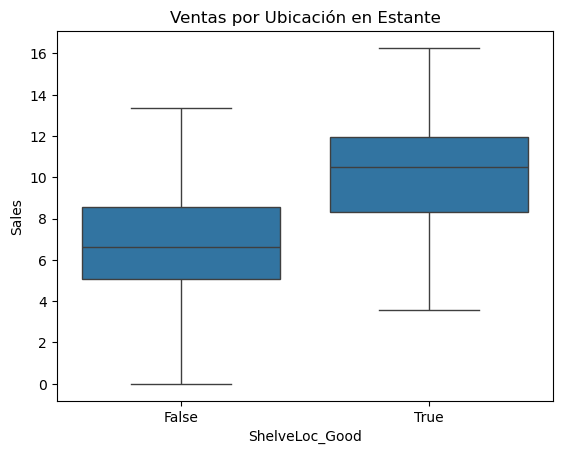

In [11]:
sns.boxplot(x="ShelveLoc_Good", y="Sales", data=Carseats)
plt.title("Ventas por Ubicación en Estante")
plt.show()

Se observa que ubicar el producto en estantantes buenos se puede generar mayores ventas. La atención del cliente se concentra mejor

### 2. Estimación de modelos lineales  (10 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

**PCA**

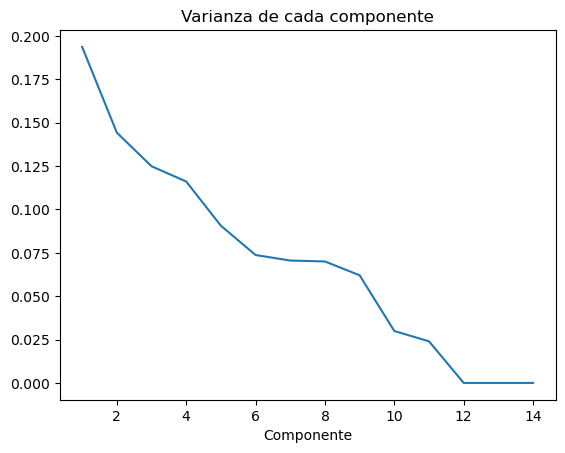

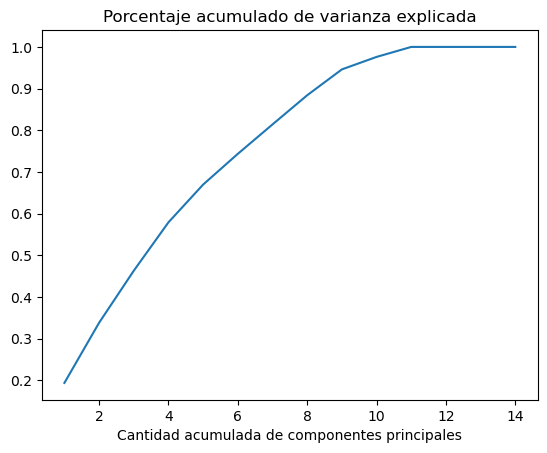

In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
### PCA
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)
###Ahora, calcularemos la matriz  𝐴 usando la siguiente línea de código:
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_
## GRAFICA
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),porcentajeVarianzaExplicada)
plt.xlabel('Componente')
plt.title('Varianza de cada componente')
plt.show()

## 2
plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

Se eligen segun el grafico 9 variables
En primer lugar, centraremos los predictores de la muestra de evaluación con la misma transformación que se utilizó en train,
Luego, usando la matriz $A$ calculada anteriormente, se transforman las variables y se utilizan únicamente las componentes elegidas:

In [13]:
nComponentesElegidas=9

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

XEscaladoTest=scaler.transform(XTest)

ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

In [14]:
prediccionPCA=regPCA.predict(ZTest)
MSEPCA=np.average(np.square(prediccionPCA-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

MSE regresión por componentes principales:
3.0371103287988457


**PLS**

Estimacion del modelo 

In [15]:
pls = PLSRegression(n_components=p)
pls.fit(XTrain, yTrain)
prediccionPLS=pls.predict(XTest)
### convierte a las predicciones anteriores en el tipo de estructura de datos necesaria para proceder
prediccionPLS=np.hstack(prediccionPLS)

In [16]:
from sklearn.metrics import mean_squared_error

MSEPLS = mean_squared_error(yTest, prediccionPLS)
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
1398040.8328445407


**LASSO**

In [17]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)
print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

El parámetro de penalización es:
0.012033778407775905
El valor del R^2 es:
0.8906401406498414
Los coeficientes estimados son:
[ 9.57086807e-02  1.45971808e-02  1.33939353e-01  4.02503159e-05
 -9.99142210e-02 -4.72290326e-02 -6.53026763e-02 -1.98214492e+00
  2.72653044e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.29811836e-01 -3.60392164e-16]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


observar lo que sucede con los coeficientes a medida que cambia el valor del parámetro de penalización

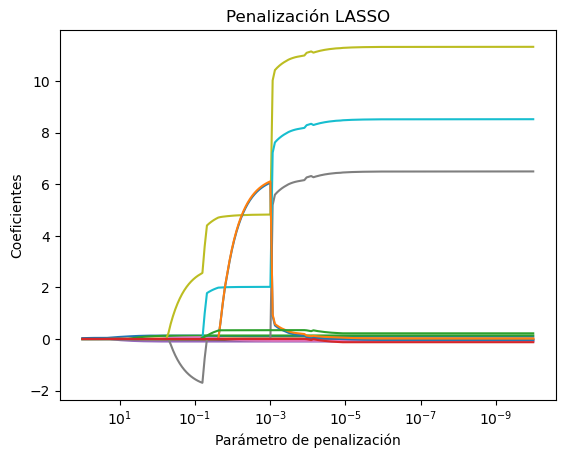

In [18]:
coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False,max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

In [19]:
import numpy as np
prediccionLASSO=modeloLASSO.predict(XTest)
prediccionLASSO_array = np.ravel(prediccionLASSO)  # Si prediccionLASSO no es 1D
yTest_array = yTest.values.ravel()                 # Convertir yTest a array 1D

MSELASSO = np.average(np.square(prediccionLASSO_array - yTest_array))
print('MSE regresión con penalización tipo LASSO:', MSELASSO)


MSE regresión con penalización tipo LASSO: 1.2585937798475826


**Comparacion**

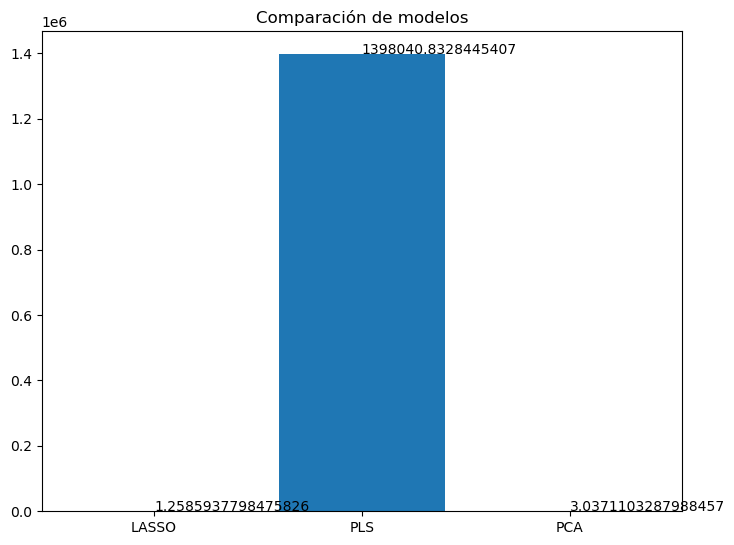

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['LASSO', 'PLS','PCA']
ejeY = [MSELASSO,MSEPLS,MSEPCA]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Conclusion**

**Menor MSE:** El modelo LASSO, con un MSE más bajo, está haciendo predicciones más precisas en promedio que el modelo basado en componentes principales.

**Regularización y Selección de Variables:** LASSO impone una penalización en los coeficientes, lo que no solo ayuda a evitar el sobreajuste, sino que también puede eliminar (poner a cero) variables irrelevantes. Esto puede ser ventajoso si tu conjunto de datos tiene muchas variables o si algunas de ellas son poco informativas.

**PCR:** Aunque la regresión por componentes principales reduce la dimensionalidad extrayendo componentes que explican la mayor parte de la variabilidad de los datos, no necesariamente se enfoca en maximizar la relación con la variable respuesta. Por ello, en algunos casos, puede no capturar las relaciones predictivas tan bien como un método de regularización como LASSO

Dado que el modelo LASSO ha demostrado el menor error y ofrece ventajas en términos de regularización y selección de variables, se elige como la mejor opción para este problema. Sin embargo, es recomendable realizar validación cruzada para afinar el hiperparámetro de penalización (alpha) y verificar la estabilidad del modelo.

### 3. Estimación del modelo MARS e interpretación de predictores (30 puntos)
3.a) Estimen un modelo MARS para predecir la variable "Sales". (15 puntos)

3.b) Interpreten el efecto de al menos 3 predictores. (15 puntos)

El resultado de la estimación del modelo MARS se presenta en el script de R adjunto.  <br>
A partir de los resultados obtenidos del modelo MARS, podemos observar que el error cuadrático medio (MSE) es de 0.9740194. Esto indica que el modelo tiene una precisión moderada en la predicción de las ventas. Sin embargo, hay margen para mejorar la precisión del modelo ajustando los parámetros o considerando otros predictores adicionales que puedan tener un impacto significativo en las ventas.

En cuanto a los efectos de los predictores, el análisis muestra que tanto el ingreso (Income) como la publicidad (Advertising) tienen un impacto notable en las ventas. El efecto parcial de estos predictores sugiere que a medida que aumenta el ingreso, las ventas también tienden a aumentar, lo cual es consistente con la teoría económica que sugiere que mayores ingresos disponibles pueden llevar a un mayor consumo. Por otro lado, la publicidad también muestra un efecto positivo en las ventas, indicando que mayores inversiones en publicidad pueden resultar en un aumento de las ventas.

Además, el análisis del efecto de la variable "Education" en las ventas muestra una relación interesante. La gráfica indica que a medida que aumenta el nivel educativo, las ventas también tienden a aumentar. Esto sugiere que los consumidores con mayor nivel educativo pueden tener un mayor poder adquisitivo o una mayor disposición a gastar en productos, lo cual se refleja en un incremento de las ventas. Este hallazgo es consistente con estudios que indican que la educación puede influir en los hábitos de consumo y en la capacidad económica de los individuos. Por lo tanto, considerar el nivel educativo de los consumidores puede ser una estrategia valiosa para segmentar el mercado y diseñar campañas de marketing más efectivas.

En conclusión, el modelo MARS proporciona una visión útil sobre cómo ciertos factores influyen en las ventas. Aunque el modelo tiene una precisión moderada, los resultados sugieren que tanto el ingreso como la publicidad son predictores importantes que deben ser considerados en estrategias de marketing y ventas. Para mejorar aún más el modelo, sería beneficioso explorar otros predictores y ajustar los parámetros del modelo para reducir el error de predicción.

### 4. Estimación del modelo GAM e interpretación de predictores (40 puntos)
4.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

In [26]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
from pygam import GAM, s, LinearGAM, te, f, l
Y = pd.DataFrame(Carseats['Sales'])
X = pd.DataFrame(Carseats.drop(columns=['Sales']))
Y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [30]:
X.head(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False
5,124,113,13,501,72,78,16,True,False,False,True,False,False,True
6,115,105,0,45,108,71,15,False,False,True,False,True,True,False
7,136,81,15,425,120,67,10,False,True,False,False,True,False,True
8,132,110,0,108,124,76,10,False,False,True,True,False,True,False
9,132,113,0,131,124,76,17,False,False,True,True,False,False,True


In [27]:
gam=LinearGAM().fit(X=X, y=Y)  #Esimación modelo GAM para regresión sin calibrar
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     75.0241
Link Function:                     IdentityLink Log Likelihood:                                  -535.4589
Number of Samples:                          400 AIC:                                             1222.9659
                                                AICc:                                            1259.2268
                                                GCV:                                                1.5281
                                                Scale:                                              1.0228
                                                Pseudo R-Squared:                                   0.8956
Feature Function                  Lam

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_39407/1534761957.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [31]:
gam2=LinearGAM(terms=s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+f(8)+f(11)+f(13)).fit(X=X, y=Y)  #Modelo GAM seleccionado términos
gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     66.4663
Link Function:                     IdentityLink Log Likelihood:                                  -665.4879
Number of Samples:                          400 AIC:                                             1465.9084
                                                AICc:                                            1493.7738
                                                GCV:                                                2.3094
                                                Scale:                                              1.6309
                                                Pseudo R-Squared:                                   0.8291
Feature Function                  Lam

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_39407/3946431685.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


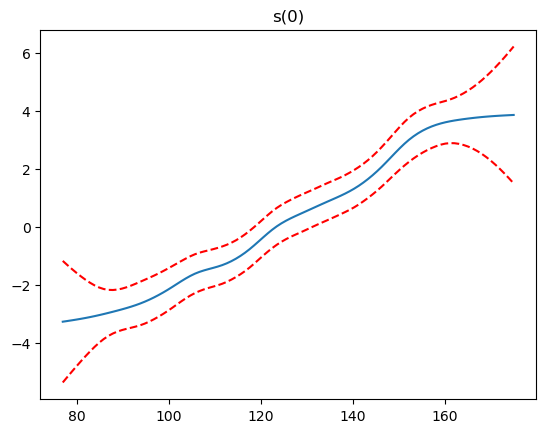

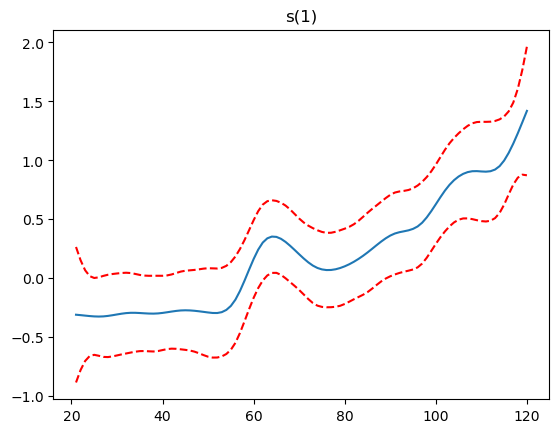

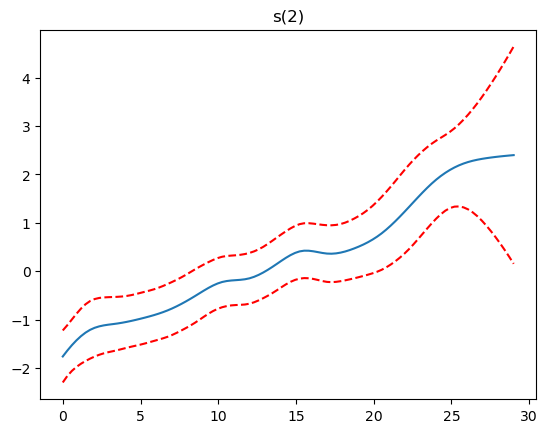

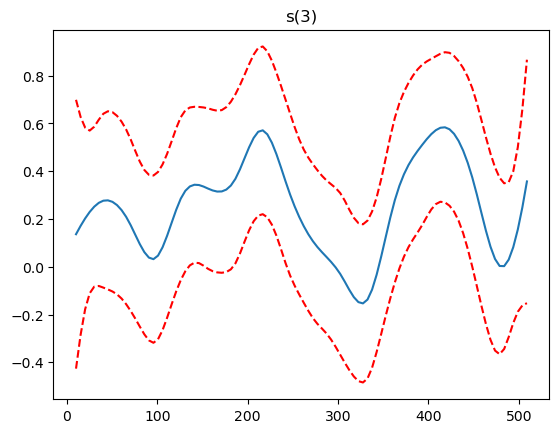

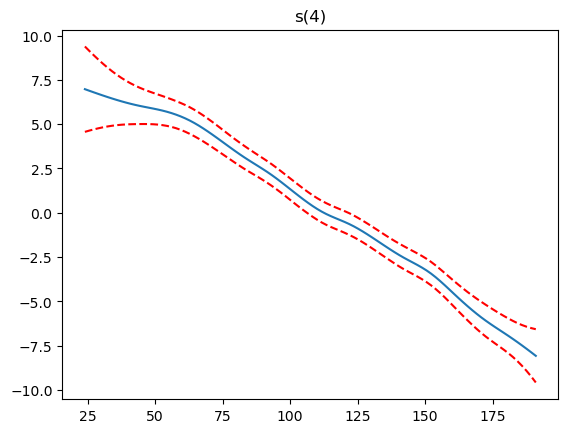

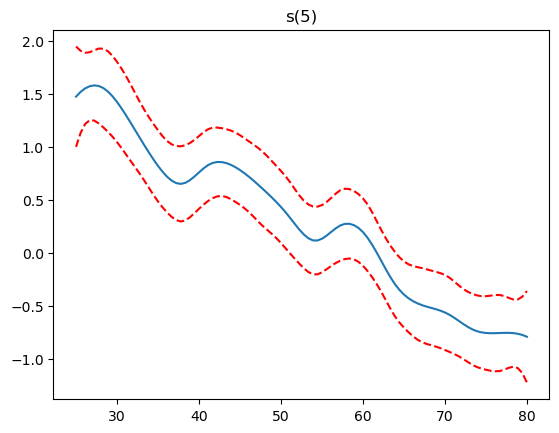

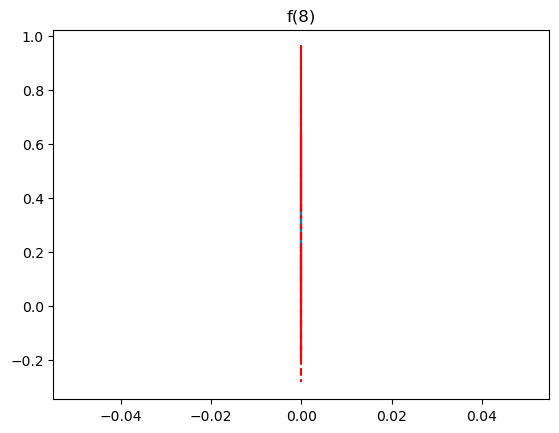

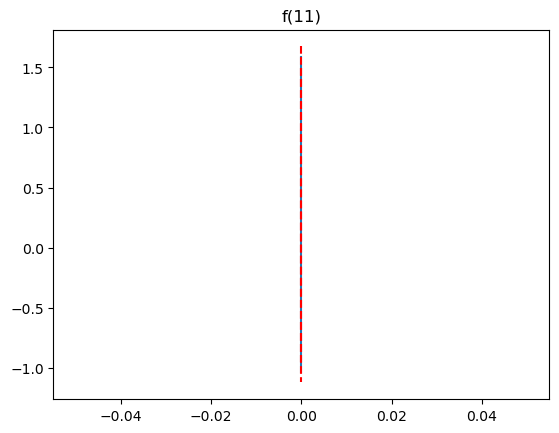

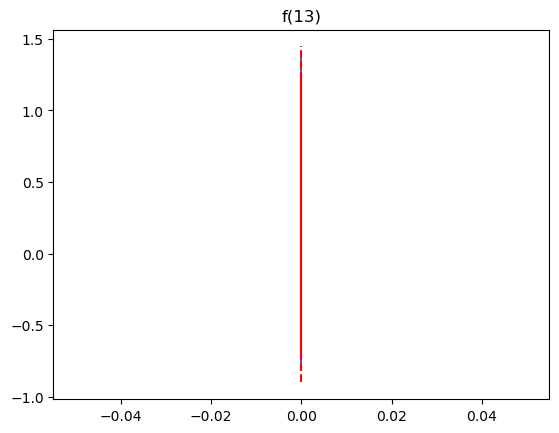

In [32]:
for i, term in enumerate(gam2.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

**Income:** Efecto positivo creciente a medida que se aumenta el número de vecinos para el cálculo del promedio. Esto puede significar que un ingreso mayor se asocia a más ventas  <br>
<br>
**Advertising:** Efecto positivo creciente a medida que se aumenta el número de vecinos para el cálculo del promedio. Se puede indicar que mayores gastos de publicidad pueden asociarse a mayores ventas. <br>
<br>
**Education:** Efecto lateral lo que indica un valor estable del estimador para este caso. La educación puede no tener un efecto de predictor fuerte para este modelo

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

In [35]:
gam3 =LinearGAM(terms=s(0)+s(1)+s(2)+s(5)+f(8)+f(11)+f(13)).fit(X=X, y=Y)  #Modelo GAM seleccionado términos
gam3.summary() #GAM sin Price ni Population

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     46.5034
Link Function:                     IdentityLink Log Likelihood:                                 -1045.5352
Number of Samples:                          400 AIC:                                             2186.0771
                                                AICc:                                            2199.1872
                                                GCV:                                                6.2836
                                                Scale:                                               4.984
                                                Pseudo R-Squared:                                   0.4464
Feature Function                  Lam

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_39407/2445927049.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam3.summary() #GAM sin Price ni Population


In [36]:
from scipy.stats import chi2

EP=gam3.statistics_['deviance']-gam.statistics_['deviance']  #Cálculo estdístico de prueba
df=gam.statistics_['edof']-gam3.statistics_['edof']  #Cálculo grados de libertad
pvalue=1-chi2.cdf(EP,df)   #Cálculo p-valor
pvalue

0.46477378095021593

**RTA:** Con este p-value de la prueba no podemos rechazar **H0** por lo que se demuestra que las variables 3(Population) y 4 (Price) no se deben tener en cuenta para el modelo

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

In [37]:
gam3 =LinearGAM(terms=s(0)+l(1)+s(2)+s(5)+f(8)+f(11)+f(13)).fit(X=X, y=Y)  #Modelo GAM seleccionado términos
gam3.summary() #GAM sin Price ni Population

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     36.2169
Link Function:                     IdentityLink Log Likelihood:                                 -1045.7835
Number of Samples:                          400 AIC:                                             2166.0008
                                                AICc:                                            2173.8636
                                                GCV:                                                5.9314
                                                Scale:                                              4.9733
                                                Pseudo R-Squared:                                   0.4315
Feature Function                  Lam

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_39407/477779178.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam3.summary() #GAM sin Price ni Population


In [38]:
EP=gam3.statistics_['deviance']-gam.statistics_['deviance']  #Cálculo estdístico de prueba
df=gam.statistics_['edof']-gam3.statistics_['edof']  #Cálculo grados de libertad
pvalue=1-chi2.cdf(EP,df)   #Cálculo p-valor
pvalue

0.4698034272561855

**RTA:** Con este p-value de la prueba no podemos rechazar **H0** por lo que se demuestra que la variable income puede ser lineal para nuestro modelo

#### Predicción del modelo

In [40]:
index_test=np.arange(0,len(Y),4)   #Indices para test
index_train=np.delete(np.arange(0,len(Y),1),index_test)   #Índices para train

X_test=X.loc[index_test]
Y_test=Y.iloc[index_test]

X_train=X.loc[index_train]
Y_train=Y.iloc[index_train]

In [41]:
gam_train=LinearGAM(terms=s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+f(8)+f(11)+f(13)).fit(X=X_train, y=Y_train)
gam_train.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     62.9422
Link Function:                     IdentityLink Log Likelihood:                                  -486.1196
Number of Samples:                          300 AIC:                                             1100.1236
                                                AICc:                                            1135.4557
                                                GCV:                                                2.4829
                                                Scale:                                              1.5673
                                                Pseudo R-Squared:                                   0.8386
Feature Function                  Lam

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_39407/1154599237.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_train.summary()


2.075596280712056


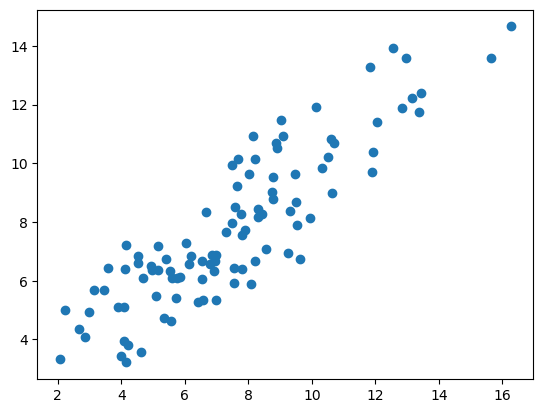

In [42]:
pred=gam_train.predict(X=X_test)  #Predicción en test
mse_gam=np.mean((pred-Y_test['Sales'].values)**2)  #MSE en test
print(mse_gam)
plt.plot(Y_test['Sales'].values, pred,'o')

### 5. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2, 3.a y 4.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

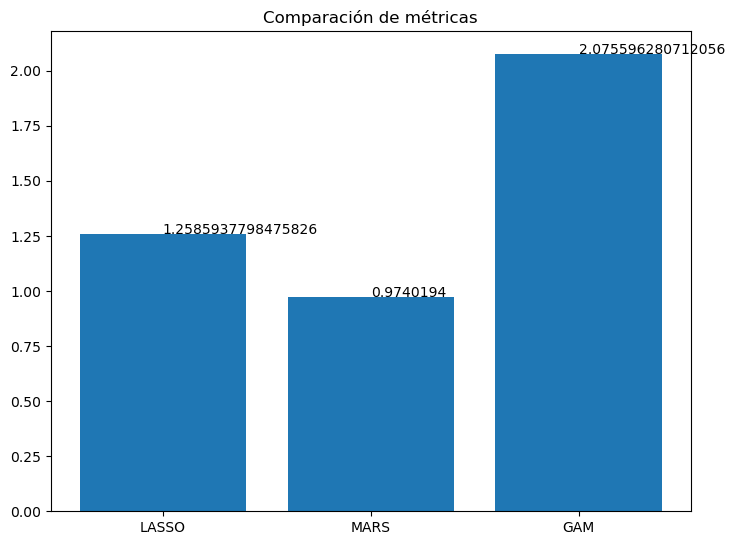

In [46]:
mse_mars = 0.9740194
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['LASSO', 'MARS','GAM']
ejeY = [MSELASSO,mse_mars,mse_gam]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Dada las distintas metodologias encontramos que aquella con el menor valor de MSE es ***MARS*** ya que ajusta las estimaciones para reducir la varianza y estima un valor donde los errores son los mínimos posibles. 